In [1]:
%matplotlib inline

In [426]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Genre Prediction Based on Music Metadata and Calculated Features

In [5]:
genres_info = pd.read_csv("data/fma/genres.csv", index_col = "genre_id")

In [6]:
genres_info

,#tracks,parent,title,top_level
genre_id,,,,
1,8693,38,Avant-Garde,38
2,5271,0,International,2
3,1752,0,Blues,3
4,4126,0,Jazz,4
5,4106,0,Classical,5
...,...,...,...,...
1032,60,102,Turkish,2
1060,30,46,Tango,2
1156,26,130,Fado,2


In [8]:
genres_info.sort_values("#tracks", ascending = False)

,#tracks,parent,title,top_level
genre_id,,,,
38,38154,0,Experimental,38
15,34413,0,Electronic,15
12,32923,0,Rock,12
1235,14938,0,Instrumental,1235
10,13845,0,Pop,10
...,...,...,...,...
493,4,651,Western Swing,9
173,4,86,N. Indian Traditional,2
377,1,19,Deep Funk,14


In [13]:
top_level_genre_ids = genres_info.top_level.unique()

In [14]:
top_level_genres = genres_info.loc[top_level_genre_ids]

In [22]:
top_level_genres = top_level_genres.sort_values("#tracks", ascending = True)[["title", "#tracks"]]

In [44]:
len(top_level_genres)

16

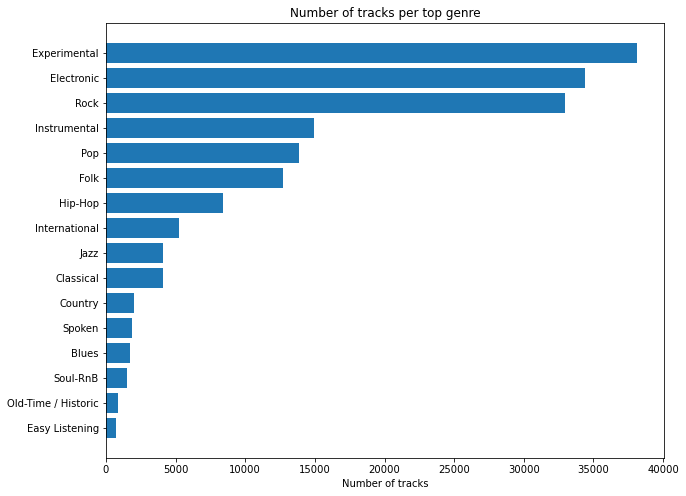

In [25]:
plt.figure(figsize = (10, 8))
plt.barh(top_level_genres["title"], top_level_genres["#tracks"])

plt.xlabel("Number of tracks")
plt.title("Number of tracks per top genre")

plt.show()

In [123]:
tracks_info = pd.read_csv("data/fma/tracks.csv", header = [0, 1])

C:\Users\Yordan\Anaconda3\envs\tf2\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [141]:
tracks_info = tracks_info.loc[1:]

In [39]:
tracks_info

Unnamed: 0_level_0    album                                            \
       Unnamed: 0_level_1 comments         date_created        date_released   
1                       2      0.0  2008-11-26 01:44:45  2009-01-05 00:00:00   
2                       3      0.0  2008-11-26 01:44:45  2009-01-05 00:00:00   
3                       5      0.0  2008-11-26 01:44:45  2009-01-05 00:00:00   
4                      10      0.0  2008-11-26 01:45:08  2008-02-06 00:00:00   
5                      20      0.0  2008-11-26 01:45:05  2009-01-06 00:00:00   
...                   ...      ...                  ...                  ...   
106570             155316      0.0  2017-03-30 15:20:35  2017-02-17 00:00:00   
106571             155317      0.0  2017-03-30 15:20:35  2017-02-17 00:00:00   
106572             155318      0.0  2017-03-30 15:20:35  2017-02-17 00:00:00   
106573             155319      0.0  2017-03-30 15:20:35  2017-02-17 00:00:00   
106574             155320      0.0  2017-03-26 16:22:18  2017-03-26 00:00:00   

                                    \
       engineer favorites       id   
1           NaN       4.0      1.0   
2           NaN       4.0      1.0   
3           NaN       4.0      1.0   
4           NaN       4.0      6.0   
5           NaN       2.0      4.0   
...         ...       ...      ...   
106570      NaN       0.0  22940.0   
106571      NaN       0.0  22940.0   
106572      NaN       0.0  22940.0   
106573      NaN       0.0  22940.0   
106574      NaN       1.0  22906.0   

                                                                    \
                                              information  listens   
1                                                 <p></p>   6073.0   
2                                                 <p></p>   6073.0   
3                                                 <p></p>   6073.0   
4                                                     NaN  47632.0   
5               <p> "spiritual songs" from Nicky Cook</p>   2710.0   
...                                                   ...      ...   
106570  <p>A live performance at Monty Hall on Feb 17,...   1506.0   
106571  <p>A live performance at Monty Hall on Feb 17,...   1506.0   
106572  <p>A live performance at Monty Hall on Feb 17,...   1506.0   
106573  <p>A live performance at Monty Hall on Feb 17,...   1506.0   
106574                                                NaN   7481.0   

                     ...       track                         \
           producer  ... information interest language_code   
1               NaN  ...         NaN   4656.0            en   
2               NaN  ...         NaN   1470.0            en   
3               NaN  ...         NaN   1933.0            en   
4               NaN  ...         NaN  54881.0            en   
5               NaN  ...         NaN    978.0            en   
...             ...  ...         ...      ...           ...   
106570  Monty Hall   ...         NaN    122.0           NaN   
106571  Monty Hall   ...         NaN    194.0           NaN   
106572  Monty Hall   ...         NaN    214.0           NaN   
106573  Monty Hall   ...         NaN    336.0           NaN   
106574          NaN  ...         NaN    972.0           NaN   

                                                                             \
                                                  license  listens lyricist   
1       Attribution-NonCommercial-ShareAlike 3.0 Inter...   1293.0      NaN   
2       Attribution-NonCommercial-ShareAlike 3.0 Inter...    514.0      NaN   
3       Attribution-NonCommercial-ShareAlike 3.0 Inter...   1151.0      NaN   
4       Attribution-NonCommercial-NoDerivatives (aka M...  50135.0      NaN   
5       Attribution-NonCommercial-NoDerivatives (aka M...    361.0      NaN   
...                                                   ...      ...      ...   
106570  Creative Commons Attribution-NonCommercial-NoD...    102.0      NaN   
106571  Creative Commons Attr

In [40]:
tracks_info.columns

MultiIndex([('Unnamed: 0_level_0', 'Unnamed: 0_level_1'),
            (             'album',           'comments'),
            (             'album',       'date_created'),
            (             'album',      'date_released'),
            (             'album',           'engineer'),
            (             'album',          'favorites'),
            (             'album',                 'id'),
            (             'album',        'information'),
            (             'album',            'listens'),
            (             'album',           'producer'),
            (             'album',               'tags'),
            (             'album',              'title'),
            (             'album',             'tracks'),
            (             'album',               'type'),
            (            'artist',  'active_year_begin'),
            (            'artist',    'active_year_end'),
            (            'artist',  'associated_labels'),
            ( 

In [45]:
tracks_info[("track", "genre_top")].unique()

array(['Hip-Hop', 'Pop', nan, 'Rock', 'Experimental', 'Folk', 'Jazz',
       'Electronic', 'Spoken', 'International', 'Soul-RnB', 'Blues',
       'Country', 'Classical', 'Old-Time / Historic', 'Instrumental',
       'Easy Listening'], dtype=object)

In [47]:
tracks_info.describe().T

count           mean            std         min  \
album  comments   106574.0       0.394946       2.268915   -1.000000   
       favorites  106574.0       1.286927       3.133035   -1.000000   
       id         106574.0   12826.933914    6290.261805   -1.000000   
       listens    106574.0   32120.306182  147853.178406   -1.000000   
       tracks     106574.0      19.721452      39.943673   -1.000000   
artist comments   106574.0       1.894702       6.297679   -1.000000   
       favorites  106574.0      30.041915     100.511408   -1.000000   
       id         106574.0   12036.770404    6881.420867    1.000000   
       latitude    44544.0      39.901626      18.240860  -45.878760   
       longitude   44544.0     -38.668642      65.237220 -157.526855   
track  bit_rate   106574.0  263274.695048   67623.443584   -1.000000   
       comments   106574.0       0.031621       0.321993    0.000000   
       duration   106574.0     277.849100     305.518553    0.000000   
       favorites  106574.0       3.182521      13.513820    0.000000   
       interest   106574.0    3541.310207   19017.430891    2.000000   
       listens    106574.0    2329.353548    8028.070647    0.000000   
       number     106574.0       8.260945      15.243271    0.000000   

                            25%            50%           75%           max  
album  comments        0.000000       0.000000       0.00000  5.300000e+01  
       favorites       0.000000       0.000000       1.00000  6.100000e+01  
       id           7793.000000   13374.000000   18203.00000  2.294000e+04  
       listens      3361.000000    8982.000000   23635.00000  3.564243e+06  
       tracks          7.000000      11.000000      17.00000  6.520000e+02  
artist comments        0.000000       0.000000       1.00000  7.900000e+01  
       favorites       1.000000       5.000000      16.00000  9.630000e+02  
       id           6443.000000   12029.500000   18011.00000  2.435700e+04  
       latitude       39.271398      41.387917      48.85693  6.728601e+01  
       longitude     -79.997459     -73.554431       4.35171  1.752770e+02  
track  bit_rate   192000.000000  299914.000000  320000.00000  4.480000e+05  
       comments        0.000000       0.000000       0.00000  3.700000e+01  
       duration      149.000000     216.000000     305.00000  1.835000e+04  
       favorites       0.000000       1.000000       3.00000  1.482000e+03  
       interest      599.000000    1314.000000    3059.00000  3.293557e+06  
       listens       292.000000     764.000000    2018.00000  5.432520e+05  
       number          2.000000       5.000000       9.00000  2.550000e+02

In [124]:
percent_missing_data = tracks_info.isna().sum()/ len(tracks_info)* 100

In [125]:
percent_missing_data

Unnamed: 0_level_0  Unnamed: 0_level_1     0.000000
album               comments               0.000938
                    date_created           3.312221
                    date_released         34.042693
                    engineer              85.648604
                    favorites              0.000938
                    id                     0.000938
                    information           21.980765
                    listens                0.000938
                    producer              83.054187
                    tags                   0.000938
                    title                  0.962702
                    tracks                 0.000938
                    type                   6.107436
artist              active_year_begin     78.690124
                    active_year_end       94.956603
                    associated_labels     86.609430
                    bio                   33.233873
                    comments               0.000938
            

In [126]:
columns_to_keep = percent_missing_data[percent_missing_data < 85].index

In [129]:
tracks_info[columns_to_keep]

Unnamed: 0_level_0    album                                            \
       Unnamed: 0_level_1 comments         date_created        date_released   
0                track_id      NaN                  NaN                  NaN   
1                       2      0.0  2008-11-26 01:44:45  2009-01-05 00:00:00   
2                       3      0.0  2008-11-26 01:44:45  2009-01-05 00:00:00   
3                       5      0.0  2008-11-26 01:44:45  2009-01-05 00:00:00   
4                      10      0.0  2008-11-26 01:45:08  2008-02-06 00:00:00   
...                   ...      ...                  ...                  ...   
106570             155316      0.0  2017-03-30 15:20:35  2017-02-17 00:00:00   
106571             155317      0.0  2017-03-30 15:20:35  2017-02-17 00:00:00   
106572             155318      0.0  2017-03-30 15:20:35  2017-02-17 00:00:00   
106573             155319      0.0  2017-03-30 15:20:35  2017-02-17 00:00:00   
106574             155320      0.0  2017-03-26 16:22:18  2017-03-26 00:00:00   

                                                                              \
       favorites       id                                        information   
0            NaN      NaN                                                NaN   
1            4.0      1.0                                            <p></p>   
2            4.0      1.0                                            <p></p>   
3            4.0      1.0                                            <p></p>   
4            4.0      6.0                                                NaN   
...          ...      ...                                                ...   
106570       0.0  22940.0  <p>A live performance at Monty Hall on Feb 17,...   
106571       0.0  22940.0  <p>A live performance at Monty Hall on Feb 17,...   
106572       0.0  22940.0  <p>A live performance at Monty Hall on Feb 17,...   
106573       0.0  22940.0  <p>A live performance at Monty Hall on Feb 17,...   
106574       1.0  22906.0                                                NaN   

                              \
        listens     producer   
0           NaN          NaN   
1        6073.0          NaN   
2        6073.0          NaN   
3        6073.0          NaN   
4       47632.0          NaN   
...         ...          ...   
106570   1506.0  Monty Hall    
106571   1506.0  Monty Hall    
106572   1506.0  Monty Hall    
106573   1506.0  Monty Hall    
106574   7481.0          NaN   

                                                           ...     track  \
                                                     tags  ... favorites   
0                                                     NaN  ...       NaN   
1                                                      []  ...       2.0   
2                                                      []  ...       1.0   
3                                                      []  ...       6.0   
4                                                      []  ...     178.0   
...                                                   ...  ...       ...   
106570                                                 []  ...       1.0   
106571                                                 []  ...       1.0   
106572                                                 []  ...       2.0   
106573                                                 []  ...       0.0   
106574  ['ballad', 'epic', 'rockabilly', 'curse', 'hex...  ...       1.0   

                                                            \
       genre_top         genres        genres_all interest   
0            NaN            NaN               NaN      NaN   
1        Hip-Hop           [21]              [21]   4656.0   
2        Hip-Hop           [21]              [21]   1470.0   
3        Hip-Hop           [21]              [21]   1933.0   
4            Pop           [10]              [10]  54881.0   
...          ...            ...               ...      ...   
106570      Rock       

In [67]:
track_id_to_genre = tracks_info[[("Unnamed: 0_level_0", "Unnamed: 0_level_1"), ("track", "genre_top")]]

In [69]:
tracks_info.head()

Unnamed: 0_level_0    album                                            \
  Unnamed: 0_level_1 comments         date_created        date_released   
1                  2      0.0  2008-11-26 01:44:45  2009-01-05 00:00:00   
2                  3      0.0  2008-11-26 01:44:45  2009-01-05 00:00:00   
3                  5      0.0  2008-11-26 01:44:45  2009-01-05 00:00:00   
4                 10      0.0  2008-11-26 01:45:08  2008-02-06 00:00:00   
5                 20      0.0  2008-11-26 01:45:05  2009-01-06 00:00:00   

                                                                               \
  favorites   id                                information  listens producer   
1       4.0  1.0                                    <p></p>   6073.0      NaN   
2       4.0  1.0                                    <p></p>   6073.0      NaN   
3       4.0  1.0                                    <p></p>   6073.0      NaN   
4       4.0  6.0                                        NaN  47632.0      NaN   
5       2.0  4.0  <p> "spiritual songs" from Nicky Cook</p>   2710.0      NaN   

        ...     track                                                   \
  tags  ... favorites genre_top     genres         genres_all interest   
1   []  ...       2.0   Hip-Hop       [21]               [21]   4656.0   
2   []  ...       1.0   Hip-Hop       [21]               [21]   1470.0   
3   []  ...       6.0   Hip-Hop       [21]               [21]   1933.0   
4   []  ...     178.0       Pop       [10]               [10]  54881.0   
5   []  ...       0.0       NaN  [76, 103]  [17, 10, 76, 103]    978.0   

                                                                           \
                                             license  listens number tags   
1  Attribution-NonCommercial-ShareAlike 3.0 Inter...   1293.0    3.0   []   
2  Attribution-NonCommercial-ShareAlike 3.0 Inter...    514.0    4.0   []   
3  Attribution-NonCommercial-ShareAlike 3.0 Inter...   1151.0    6.0   []   
4  Attribution-NonCommercial-NoDerivatives (aka M...  50135.0    1.0   []   
5  Attribution-NonCommercial-NoDerivatives (aka M...    361.0    3.0   []   

                    
             title  
1             Food  
2     Electric Ave  
3       This World  
4          Freeway  
5  Spiritual Level  

[5 rows x 42 columns]

In [130]:
columns_to_remove = [("Unnamed: 0_level_0", "Unnamed: 0_level_1"), ("album", "id"), ("album", "information"), ("album", "tags"), ("album", "title"), ("album", "producer"), ("artist", "bio"), ("artist", "id"), ("artist", "latitude"), ("artist", "longitude"), ("artist", "location"), ("artist", "members"), ("artist", "name"), ("artist", "tags"), ("artist", "website"), ("track", "genres"), ("track", "genres_all"), ("track", "license"), ("track", "tags"), ("track", "title")]

In [131]:
columns_to_keep_manual_selection = set(tracks_info.columns).difference(set(columns_to_remove))

In [132]:
tracks_info = tracks_info[columns_to_keep_manual_selection]

In [133]:
sets = tracks_info[[("set", "subset"), ("set", "split")]]

In [137]:
tracks_info = tracks_info.drop([("set", "subset"), ("set", "split")], axis = 1)

In [138]:
tracks_info

album              track                                  artist  \
       favorites comments  bit_rate         date_created duration favorites   
0            NaN      NaN       NaN                  NaN      NaN       NaN   
1            4.0      0.0  256000.0  2008-11-26 01:48:12    168.0       9.0   
2            4.0      0.0  256000.0  2008-11-26 01:48:14    237.0       9.0   
3            4.0      0.0  256000.0  2008-11-26 01:48:20    206.0       9.0   
4            4.0      0.0  192000.0  2008-11-25 17:49:06    161.0      74.0   
...          ...      ...       ...                  ...      ...       ...   
106570       0.0      0.0  320000.0  2017-03-30 15:23:34    162.0       0.0   
106571       0.0      0.0  320000.0  2017-03-30 15:23:36    217.0       0.0   
106572       0.0      0.0  320000.0  2017-03-30 15:23:37    404.0       0.0   
106573       0.0      0.0  320000.0  2017-03-30 15:23:39    146.0       0.0   
106574       1.0      0.0  320000.0  2017-03-30 09:15:36    198.0      12.0   

                 track               artist    track  ...  album  \
       comments number         date_created  listens  ... tracks   
0           NaN    NaN                  NaN      NaN  ...    NaN   
1           0.0    3.0  2008-11-26 01:42:32   1293.0  ...    7.0   
2           0.0    4.0  2008-11-26 01:42:32    514.0  ...    7.0   
3           0.0    6.0  2008-11-26 01:42:32   1151.0  ...    7.0   
4           3.0    1.0  2008-11-26 01:42:55  50135.0  ...    2.0   
...         ...    ...                  ...      ...  ...    ...   
106570      0.0    3.0  2017-03-30 15:18:28    102.0  ...    6.0   
106571      0.0    4.0  2017-03-30 15:18:28    165.0  ...    6.0   
106572      0.0    6.0  2017-03-30 15:18:28    168.0  ...    6.0   
106573      0.0    5.0  2017-03-30 15:18:28    294.0  ...    6.0   
106574      1.0    7.0  2016-02-04 17:26:24    705.0  ...   11.0   

                                                                 track  \
               date_created        date_released     producer comments   
0                       NaN                  NaN          NaN      NaN   
1       2008-11-26 01:44:45  2009-01-05 00:00:00          NaN      0.0   
2       2008-11-26 01:44:45  2009-01-05 00:00:00          NaN      0.0   
3       2008-11-26 01:44:45  2009-01-05 00:00:00          NaN      0.0   
4       2008-11-26 01:45:08  2008-02-06 00:00:00          NaN      0.0   
...                     ...                  ...          ...      ...   
106570  2017-03-30 15:20:35  2017-02-17 00:00:00  Monty Hall       0.0   
106571  2017-03-30 15:20:35  2017-02-17 00:00:00  Monty Hall       0.0   
106572  2017-03-30 15:20:35  2017-02-17 00:00:00  Monty Hall       0.0   
106573  2017-03-30 15:20:35  2017-02-17 00:00:00  Monty Hall       0.0   
106574  2017-03-26 16:22:18  2017-03-26 00:00:00          NaN      0.0   

                   album     track                          album     track  \
                    type genre_top                          title favorites   
0                    NaN       NaN                            NaN       NaN   
1                  Album   Hip-Hop           AWOL - A Way Of Life       2.0   
2                  Album   Hip-Hop           AWOL - A Way Of Life       1.0   
3                  Album   Hip-Hop           AWOL - A Way Of Life       6.0   
4                  Album       Pop              Constant Hitmaker     178.0   
...                  ...       ...                            ...       ...   
106570  Live Performance      Rock  Live at Monty Hall, 2/17/2017       1.0   
106571  Live Performance      Rock  Live at Monty Hall, 2/17/2017       1.0   
106572  Live Performance      Rock  Live at Monty Hall, 2/17/2017       2.0   
106573  Live Performance      Rock  Live at Monty Hall, 2/17/2017       0.0   
106574             Album       NaN      What I Tell Myself Vol. 2       1.0   

          album  
        listens  
0           NaN  
1        6073.0  
2        6073.0  
3        6073.0  

In [139]:
tracks_info.columns

MultiIndex([( 'album',         'favorites'),
            ( 'album',          'comments'),
            ( 'track',          'bit_rate'),
            ( 'track',      'date_created'),
            ( 'track',          'duration'),
            ('artist',         'favorites'),
            ('artist',          'comments'),
            ( 'track',            'number'),
            ('artist',      'date_created'),
            ( 'track',           'listens'),
            ('artist', 'active_year_begin'),
            ( 'track',          'interest'),
            ( 'album',            'tracks'),
            ( 'album',      'date_created'),
            ( 'album',     'date_released'),
            ( 'album',          'producer'),
            ( 'track',          'comments'),
            ( 'album',              'type'),
            ( 'track',         'genre_top'),
            ( 'album',             'title'),
            ( 'track',         'favorites'),
            ( 'album',           'listens')],
         

In [142]:
tracks_info

album              track                                  artist  \
       favorites comments  bit_rate         date_created duration favorites   
1            4.0      0.0  256000.0  2008-11-26 01:48:12    168.0       9.0   
2            4.0      0.0  256000.0  2008-11-26 01:48:14    237.0       9.0   
3            4.0      0.0  256000.0  2008-11-26 01:48:20    206.0       9.0   
4            4.0      0.0  192000.0  2008-11-25 17:49:06    161.0      74.0   
5            2.0      0.0  256000.0  2008-11-26 01:48:56    311.0      10.0   
...          ...      ...       ...                  ...      ...       ...   
106570       0.0      0.0  320000.0  2017-03-30 15:23:34    162.0       0.0   
106571       0.0      0.0  320000.0  2017-03-30 15:23:36    217.0       0.0   
106572       0.0      0.0  320000.0  2017-03-30 15:23:37    404.0       0.0   
106573       0.0      0.0  320000.0  2017-03-30 15:23:39    146.0       0.0   
106574       1.0      0.0  320000.0  2017-03-30 09:15:36    198.0      12.0   

                 track               artist    track  ...  album  \
       comments number         date_created  listens  ... tracks   
1           0.0    3.0  2008-11-26 01:42:32   1293.0  ...    7.0   
2           0.0    4.0  2008-11-26 01:42:32    514.0  ...    7.0   
3           0.0    6.0  2008-11-26 01:42:32   1151.0  ...    7.0   
4           3.0    1.0  2008-11-26 01:42:55  50135.0  ...    2.0   
5           2.0    3.0  2008-11-26 01:42:52    361.0  ...   13.0   
...         ...    ...                  ...      ...  ...    ...   
106570      0.0    3.0  2017-03-30 15:18:28    102.0  ...    6.0   
106571      0.0    4.0  2017-03-30 15:18:28    165.0  ...    6.0   
106572      0.0    6.0  2017-03-30 15:18:28    168.0  ...    6.0   
106573      0.0    5.0  2017-03-30 15:18:28    294.0  ...    6.0   
106574      1.0    7.0  2016-02-04 17:26:24    705.0  ...   11.0   

                                                                 track  \
               date_created        date_released     producer comments   
1       2008-11-26 01:44:45  2009-01-05 00:00:00          NaN      0.0   
2       2008-11-26 01:44:45  2009-01-05 00:00:00          NaN      0.0   
3       2008-11-26 01:44:45  2009-01-05 00:00:00          NaN      0.0   
4       2008-11-26 01:45:08  2008-02-06 00:00:00          NaN      0.0   
5       2008-11-26 01:45:05  2009-01-06 00:00:00          NaN      0.0   
...                     ...                  ...          ...      ...   
106570  2017-03-30 15:20:35  2017-02-17 00:00:00  Monty Hall       0.0   
106571  2017-03-30 15:20:35  2017-02-17 00:00:00  Monty Hall       0.0   
106572  2017-03-30 15:20:35  2017-02-17 00:00:00  Monty Hall       0.0   
106573  2017-03-30 15:20:35  2017-02-17 00:00:00  Monty Hall       0.0   
106574  2017-03-26 16:22:18  2017-03-26 00:00:00          NaN      0.0   

                   album     track                          album     track  \
                    type genre_top                          title favorites   
1                  Album   Hip-Hop           AWOL - A Way Of Life       2.0   
2                  Album   Hip-Hop           AWOL - A Way Of Life       1.0   
3                  Album   Hip-Hop           AWOL - A Way Of Life       6.0   
4                  Album       Pop              Constant Hitmaker     178.0   
5                  Album       NaN                          Niris       0.0   
...                  ...       ...                            ...       ...   
106570  Live Performance      Rock  Live at Monty Hall, 2/17/2017       1.0   
106571  Live Performance      Rock  Live at Monty Hall, 2/17/2017       1.0   
106572  Live Performance      Rock  Live at Monty Hall, 2/17/2017       2.0   
106573  Live Performance      Rock  Live at Monty Hall, 2/17/2017       0.0   
106574             Album       NaN      What I Tell Myself Vol. 2       1.0   

          album  
        listens  
1        6073.0  
2        6073.0  
3        6073.0  
4       47632.0  

In [150]:
pd.to_datetime(tracks_info[("artist", "date_created")])

1         11.0
2         11.0
3         11.0
4         11.0
5         11.0
          ... 
106570     3.0
106571     3.0
106572     3.0
106573     3.0
106574     2.0
Name: (artist, date_created), Length: 106574, dtype: float64

In [151]:
tracks_info.columns

MultiIndex([( 'album',         'favorites'),
            ( 'album',          'comments'),
            ( 'track',          'bit_rate'),
            ( 'track',      'date_created'),
            ( 'track',          'duration'),
            ('artist',         'favorites'),
            ('artist',          'comments'),
            ( 'track',            'number'),
            ('artist',      'date_created'),
            ( 'track',           'listens'),
            ('artist', 'active_year_begin'),
            ( 'track',          'interest'),
            ( 'album',            'tracks'),
            ( 'album',      'date_created'),
            ( 'album',     'date_released'),
            ( 'album',          'producer'),
            ( 'track',          'comments'),
            ( 'album',              'type'),
            ( 'track',         'genre_top'),
            ( 'album',             'title'),
            ( 'track',         'favorites'),
            ( 'album',           'listens')],
         

In [173]:
tracks_info.dtypes

album   favorites            float64
        comments             float64
track   bit_rate             float64
        date_created          object
        duration             float64
artist  favorites            float64
        comments             float64
track   number               float64
artist  date_created          object
track   listens              float64
artist  active_year_begin     object
track   interest             float64
album   tracks               float64
        date_created          object
        date_released         object
track   comments             float64
album   type                  object
track   genre_top             object
        favorites            float64
album   listens              float64
dtype: object

In [174]:
datetime_variables = [("track", "date_created"), ("artist", "date_created"), ("artist", "active_year_begin"), ("album", "date_created"), ("album", "date_released")]

In [177]:
datetime_variables_processed = pd.DataFrame()
for datetime_variable in datetime_variables:
    date = pd.to_datetime(tracks_info[datetime_variable])
    
    column_name = f"{datetime_variable[0]}_{datetime_variable[1]}"
    datetime_variables_processed[column_name + "_year"] = date.dt.year
    datetime_variables_processed[column_name + "_month"] = date.dt.month

In [182]:
tracks_info = pd.merge(left = tracks_info, right = datetime_variables_processed, left_on = tracks_info.index, right_on = datetime_variables_processed.index, )

C:\Users\Yordan\Anaconda3\envs\tf2\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [183]:
tracks_info.columns

Index([                         'key_0',           ('album', 'favorites'),
                  ('album', 'comments'),            ('track', 'bit_rate'),
              ('track', 'date_created'),            ('track', 'duration'),
                ('artist', 'favorites'),           ('artist', 'comments'),
                    ('track', 'number'),       ('artist', 'date_created'),
                   ('track', 'listens'),  ('artist', 'active_year_begin'),
                  ('track', 'interest'),              ('album', 'tracks'),
              ('album', 'date_created'),       ('album', 'date_released'),
                  ('track', 'comments'),                ('album', 'type'),
                 ('track', 'genre_top'),           ('track', 'favorites'),
                   ('album', 'listens'),        'track_date_created_year',
             'track_date_created_month',       'artist_date_created_year',
            'artist_date_created_month',  'artist_active_year_begin_year',
       'artist_active_yea

In [186]:
tracks_info = tracks_info.drop(datetime_variables, axis = 1)

In [188]:
tracks_info = tracks_info.drop(["key_0"], axis = 1)

In [190]:
tracks_info.dtypes

(album, favorites)                float64
(album, comments)                 float64
(track, bit_rate)                 float64
(track, duration)                 float64
(artist, favorites)               float64
(artist, comments)                float64
(track, number)                   float64
(track, listens)                  float64
(track, interest)                 float64
(album, tracks)                   float64
(track, comments)                 float64
(album, type)                      object
(track, genre_top)                 object
(track, favorites)                float64
(album, listens)                  float64
track_date_created_year             int64
track_date_created_month            int64
artist_date_created_year          float64
artist_date_created_month         float64
artist_active_year_begin_year     float64
artist_active_year_begin_month    float64
album_date_created_year           float64
album_date_created_month          float64
album_date_released_year          

In [193]:
genres = tracks_info[("track", "genre_top")]

In [195]:
track_attributes = tracks_info.drop(("track", "genre_top"), axis = 1)

In [197]:
track_attributes = pd.get_dummies(track_attributes)

In [223]:
track_attributes = track_attributes.fillna(0)

In [198]:
track_attributes.describe().T

,count,mean,std,min,25%,50%,75%,max
"(album, favorites)",106574.0,1.286927,3.133035,-1.0,0.0,0.0,1.0,61.0
"(album, comments)",106574.0,0.394946,2.268915,-1.0,0.0,0.0,0.0,53.0
"(track, bit_rate)",106574.0,263274.695048,67623.443584,-1.0,192000.0,299914.0,320000.0,448000.0
"(track, duration)",106574.0,277.849100,305.518553,0.0,149.0,216.0,305.0,18350.0
"(artist, favorites)",106574.0,30.041915,100.511408,-1.0,1.0,5.0,16.0,963.0
"(artist, comments)",106574.0,1.894702,6.297679,-1.0,0.0,0.0,1.0,79.0
"(track, number)",106574.0,8.260945,15.243271,0.0,2.0,5.0,9.0,255.0
"(track, listens)",106574.0,2329.353548,8028.070647,0.0,292.0,764.0,2018.0,543252.0
"(track, interest)",106574.0,3541.310207,19017.430891,2.0,599.0,1314.0,3059.0,3293557.0
"(album, tracks)",106574.0,19.721452,39.943673,-1.0,7.0,11.0,17.0,652.0


In [203]:
genres.unique()

array(['Hip-Hop', 'Pop', nan, 'Rock', 'Experimental', 'Folk', 'Jazz',
       'Electronic', 'Spoken', 'International', 'Soul-RnB', 'Blues',
       'Country', 'Classical', 'Old-Time / Historic', 'Instrumental',
       'Easy Listening'], dtype=object)

In [205]:
genres.groupby(genres).size().sort_values(ascending = False)

(track, genre_top)
Rock                   14182
Experimental           10608
Electronic              9372
Hip-Hop                 3552
Folk                    2803
Pop                     2332
Instrumental            2079
International           1389
Classical               1230
Jazz                     571
Old-Time / Historic      554
Spoken                   423
Country                  194
Soul-RnB                 175
Blues                    110
Easy Listening            24
Name: (track, genre_top), dtype: int64

In [224]:
len(genres[genres.isna()]) / len(genres)

0.0

In [225]:
genres = genres[~genres.isna()]

In [226]:
track_attributes = track_attributes.loc[genres.index]

In [227]:
len(genres), len(track_attributes)

(49598, 49598)

In [228]:
track_attributes_scaled = MinMaxScaler().fit_transform(track_attributes)

In [229]:
track_attributes_train, track_attributes_test, genres_train, genres_test = train_test_split(
    track_attributes_scaled,
    genres,
    test_size = 0.15,
    stratify = genres)

In [230]:
track_attributes_train.shape, track_attributes_test.shape, genres_train.shape, genres_test.shape

((42158, 28), (7440, 28), (42158,), (7440,))

In [233]:
logistic_regression = LogisticRegression(C = 1, max_iter = 1000)

In [234]:
logistic_regression.fit(track_attributes_train, genres_train)

LogisticRegression(C=1, max_iter=1000)

In [235]:
def display_scores(estimator, train_attributes, train_labels, test_attributes, test_labels):
    print(f"Train score: {estimator.score(train_attributes, train_labels)}")
    print(f"Test score: {estimator.score(test_attributes, test_labels)}")    

In [236]:
display_scores(logistic_regression, track_attributes_train, genres_train, track_attributes_test, genres_test)

Train score: 0.4303097869917928
Test score: 0.42338709677419356


In [240]:
test_predictions = logistic_regression.predict(track_attributes_test)
cm = confusion_matrix(genres_test, test_predictions)

<AxesSubplot:>

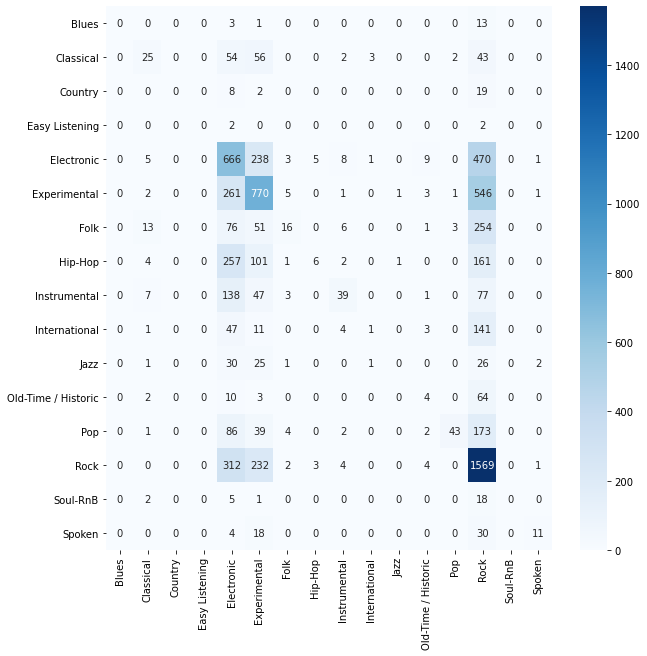

In [250]:
plt.figure(figsize = (10, 10))
sns.heatmap(
    cm, 
    annot = True, 
    fmt = "d", 
    cmap = plt.cm.Blues, 
    xticklabels = logistic_regression.classes_,
    yticklabels = logistic_regression.classes_)

In [265]:
track_audio_features = pd.read_csv("data/fma/features.csv", header = [0, 1, 2, 3])

In [266]:
track_audio_features

feature        chroma_cens                                        \
       statistics           kurtosis                                         
           number                 01                 02                 03   
         track_id Unnamed: 1_level_3 Unnamed: 2_level_3 Unnamed: 3_level_3   
0               2           7.180653           5.230309           0.249321   
1               3           1.888963           0.760539           0.345297   
2               5           0.527563          -0.077654          -0.279610   
3              10           3.702245          -0.291193           2.196742   
4              20          -0.193837          -0.198527           0.201546   
...           ...                ...                ...                ...   
106569     155316          -0.490129           0.463834           2.321970   
106570     155317          -0.461559          -0.229601          -0.496632   
106571     155318           0.552473          -0.110498          -0.532014   
106572     155319          -0.176901           0.187208          -0.050664   
106573     155320           0.489665           1.862421           0.854461   

                                                                 \
                                                                  
                       04                 05                 06   
       Unnamed: 4_level_3 Unnamed: 5_level_3 Unnamed: 6_level_3   
0                1.347620           1.482478           0.531371   
1                2.295201           1.654031           0.067592   
2                0.685883           1.937570           0.880839   
3               -0.234449           1.367364           0.998411   
4                0.258556           0.775204           0.084794   
...                   ...                ...                ...   
106569          -0.084352           1.662914           2.115189   
106570          -0.422033           0.130612          -0.263825   
106571           0.263131          -0.224011          -0.530972   
106572           0.368843           0.066005          -0.857354   
106573          -0.103666          -0.249835           0.360283   

                                                                 ...  \
                                                                 ...   
                       07                 08                 09  ...   
       Unnamed: 7_level_3 Unnamed: 8_level_3 Unnamed: 9_level_3  ...   
0                1.481593           2.691455           0.866868  ...   
1                1.366848           1.054094           0.108103  ...   
2               -0.923192          -0.927232           0.666617  ...   
3                1.770694           1.604566           0.521217  ...   
4               -0.289294          -0.816410           0.043851  ...   
...                   ...                ...                ...  ...   
106569          -0.237794           5.695442           0.830353  ...   
106570          -0.628103          -0.082687          -0.229483  ...   
106571           1.713526           1.418444           1.325197  ...   
106572          -0.780860           0.626281          -0.630938  ...   
106573          -0.366701           0.033578          -0.834606  ...   

                    tonnetz                                            \
                        std                                             
                         04                   05                   06   
       Unnamed: 509_level_3 Unnamed: 510_level_3 Unnamed: 511_level_3   
0                  0.054125             0.012226             0.012111   
1                  0.063831             0.014212             0.017740   
2                  0.040730             0.012691             0.014759   
3                  0.074358             0.017952             0.013921   
4                  0.095003             0.022492             0.021355   
...                     ...                  ...                  ...   
106569             0.1

In [269]:
track_ids = track_audio_features[("feature", "statistics", "number", "track_id")]

In [290]:
tracks_for_modelling = track_id_to_genre[track_id_to_genre[("track", "genre_top")].isin(["Rock", "Hip-Hop", "Instrumental"])]

In [296]:
track_ids_for_modelling = tracks_for_modelling[("Unnamed: 0_level_0", "Unnamed: 0_level_1")]
track_genres_for_modelling = tracks_for_modelling[("track", "genre_top")]

In [297]:
track_ids_for_modelling

1              2
2              3
3              5
10           134
11           135
           ...  
106569    155315
106570    155316
106571    155317
106572    155318
106573    155319
Name: (Unnamed: 0_level_0, Unnamed: 0_level_1), Length: 19813, dtype: object

In [287]:
track_audio_features_for_modelling = track_audio_features[track_ids.isin(track_ids_for_modelling)]

In [289]:
track_audio_features_for_modelling = track_audio_features_for_modelling.drop([("feature", "statistics", "number", "track_id")], axis = 1)

In [319]:
track_audio_features_for_modelling = MinMaxScaler().fit_transform(track_audio_features_for_modelling)

In [320]:
track_audio_features_train, track_audio_features_test, genres_af_train, genres_af_test = train_test_split(
    track_audio_features_for_modelling,
    track_genres_for_modelling,
    test_size = 3500,
    stratify = track_genres_for_modelling
)

In [321]:
track_audio_features_train.shape, track_audio_features_test.shape, genres_af_train.shape, genres_af_test.shape

((16313, 518), (3500, 518), (16313,), (3500,))

In [322]:
pca = PCA(n_components = 2)

In [323]:
pca.fit(track_audio_features_train)

PCA(n_components=2)

In [324]:
pcs = pca.transform(track_audio_features_train)

In [325]:
first_pc, second_pc = pcs[:, 0], pcs[:, 1]

In [326]:
genre_colors = LabelEncoder().fit_transform(genres_af_train)

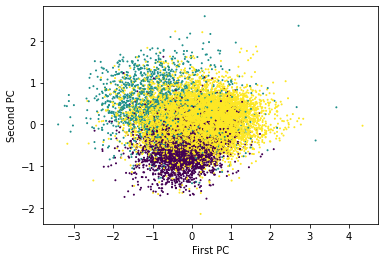

In [327]:
plt.scatter(first_pc, second_pc, c = genre_colors, s = 1)
plt.xlabel("First PC")
plt.ylabel("Second PC")
plt.show()

In [329]:
logistic_regression_af = LogisticRegression(max_iter = 1000)
logistic_regression_af.fit(track_audio_features_train, genres_af_train)

C:\Users\Yordan\Anaconda3\envs\tf2\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=1000)

In [330]:
display_scores(logistic_regression_af, track_audio_features_train, genres_af_train, track_audio_features_test, genres_af_test)

Train score: 0.9062097713480046
Test score: 0.8925714285714286


In [360]:
def plot_confusion_matrix(estimator, attributes, labels, title = None):
    predictions = estimator.predict(attributes)
    cm = confusion_matrix(labels, predictions, normalize = "all")
    
    plt.figure(figsize = (5, 5))
    if title is not None:
        plt.title(title)
    sns.heatmap(
        cm, 
        annot = cm, 
        fmt = ".3%", 
        cmap = plt.cm.Blues, 
        xticklabels = estimator.classes_,
        yticklabels = estimator.classes_)
    plt.show()

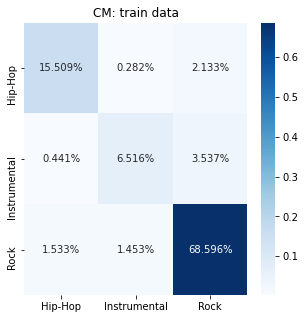

In [361]:
plot_confusion_matrix(logistic_regression_af, track_audio_features_train, genres_af_train, title = "CM: train data")

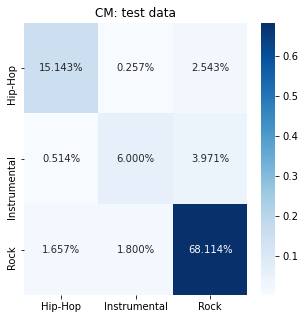

In [362]:
plot_confusion_matrix(logistic_regression_af, track_audio_features_test, genres_af_test, title = "CM: test data")

In [366]:
print(classification_report(genres_af_test, logistic_regression_af.predict(track_audio_features_test)))

              precision    recall  f1-score   support

     Hip-Hop       0.87      0.84      0.86       628
Instrumental       0.74      0.57      0.65       367
        Rock       0.91      0.95      0.93      2505

    accuracy                           0.89      3500
   macro avg       0.84      0.79      0.81      3500
weighted avg       0.89      0.89      0.89      3500



In [386]:
params_lr = {
    "solver": ["liblinear"],
    "penalty": ["l1"],
#     "C": 10 ** np.arange(-4, 5, dtype = np.float64)
    "C":[1e-2, 1e-3]
}
grid_search_lr = GridSearchCV(LogisticRegression(), params_lr, cv = 5)

In [387]:
grid_search_lr.fit(track_audio_features_train, genres_af_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.001], 'penalty': ['l1'],
                         'solver': ['liblinear']})

In [388]:
grid_search_lr.best_estimator_

LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

In [391]:
grid_search_lr.cv_results_

{'mean_fit_time': array([1.43309393, 1.27858639]),
 'std_fit_time': array([0.03857978, 0.16404777]),
 'mean_score_time': array([0.00985665, 0.01057172]),
 'std_score_time': array([0.00160719, 0.0027906 ]),
 'param_C': masked_array(data=[0.01, 0.001],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l1', 'l1'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_solver': masked_array(data=['liblinear', 'liblinear'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'},
  {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}],
 'split0_test_score': array([0.76310144, 0.71590561]),
 'split1_test_score': array([0.75819798, 0.71559914]),
 'split2_test_score': array([0.75513331, 0.71559914]),
 'split3_test_score': array([0.76364194, 0.71581852]),
 'split4_test_score': array([0.75

In [390]:
grid_search_lr.cv_results_["params"]

[{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'},
 {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}]

In [392]:
display_scores(grid_search_lr.best_estimator_, track_audio_features_train, genres_af_train, track_audio_features_test, genres_af_test)

Train score: 0.7888187335254092
Test score: 0.786


In [395]:
len(grid_search_lr.best_estimator_.coef_[grid_search_lr.best_estimator_.coef_ != 0])

47

In [409]:
pca_af = PCA(n_components = 20)

In [410]:
pca_af.fit(track_audio_features_train)

PCA(n_components=20)

In [414]:
track_audio_features_pca_train = pca_af.transform(track_audio_features_train)
track_audio_features_pca_test = pca_af.transform(track_audio_features_test)

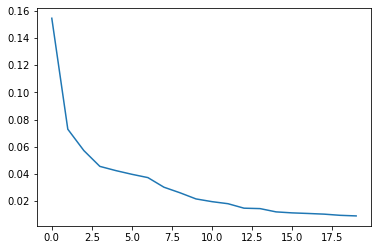

In [412]:
plt.plot(pca_af.explained_variance_ratio_)

In [416]:
params_lr = {
    "solver": ["liblinear"],
    "penalty": ["l1"],
    "C": 10 ** np.arange(-4, 5, dtype = np.float64)
}
grid_search_lr = GridSearchCV(LogisticRegression(), params_lr, cv = 5)

In [417]:
grid_search_lr.fit(track_audio_features_pca_train, genres_af_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04]),
                         'penalty': ['l1'], 'solver': ['liblinear']})

In [418]:
grid_search_lr.cv_results_

{'mean_fit_time': array([0.04847016, 0.06442742, 0.09414296, 0.13523879, 0.14062362,
        0.14417119, 0.14780164, 0.145012  , 0.14341621]),
 'std_fit_time': array([0.00232562, 0.00325365, 0.0037033 , 0.00580174, 0.00423146,
        0.00887808, 0.00671927, 0.00499118, 0.00341944]),
 'mean_score_time': array([0.00420089, 0.00398912, 0.0041883 , 0.00438771, 0.00518618,
        0.00383296, 0.00458808, 0.00438843, 0.00498624]),
 'std_score_time': array([0.0007421 , 0.00089234, 0.00039899, 0.00079782, 0.00116293,
        0.00076317, 0.00048848, 0.00048825, 0.00063075]),
 'param_C': masked_array(data=[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0,
                    10000.0],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l1', 'l1', 'l1', 'l1', 'l1', 'l1', 'l1', 'l1', 'l1'],
              mask=[False, False, False, False, False, False, Fal

In [419]:
grid_search_lr.best_params_

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [420]:
grid_search_lr.best_estimator_.coef_

array([[-4.50966075e-01, -4.41445307e+00, -1.71846558e+00,
        -2.36043430e-01,  4.75437391e-01,  5.35701565e-01,
        -9.08804500e-02,  2.02552546e+00,  2.25046211e+00,
         7.25590875e-01,  1.85739417e+00, -1.02996589e+00,
         8.48425092e-01, -9.75809394e-01,  7.49966980e-01,
        -1.19466751e+00, -3.91490460e+00, -2.02055729e+00,
        -3.26810558e+00, -2.27160597e+00],
       [-1.34709108e+00,  1.56600568e+00, -1.07380217e-02,
         3.43948489e-01,  8.46643877e-01,  6.80800142e-01,
        -3.82782523e-02,  1.61839477e+00,  1.56977366e+00,
         2.40280172e-01,  6.33238492e-01,  1.26521462e+00,
         1.18814718e-01,  6.66720494e-02, -1.26265592e+00,
         8.93862539e-01,  1.90049737e+00, -4.10124304e-01,
         1.87860633e+00,  1.92962357e+00],
       [ 1.43299399e+00,  1.34779265e+00,  1.31515274e+00,
        -1.98593139e-01, -9.58442239e-01, -8.25795792e-01,
         9.57214010e-02, -2.60501723e+00, -2.88268298e+00,
        -8.63629548e-01, -1.6

In [422]:
k_means = KMeans(n_clusters = 3)

In [423]:
k_means.fit(track_audio_features_pca_train)

KMeans(n_clusters=3)

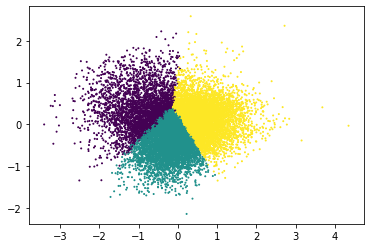

In [431]:
plt.scatter(track_audio_features_pca_train[:, 0], track_audio_features_pca_train[:, 1], c = k_means.predict(track_audio_features_pca_train), s = 1)